# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing datasets

In [2]:
# Creating string of project folder path
path = r'C:\Users\augus\Documents\01-2026 Instacart Basket Analysis' 

In [3]:
# importing the final merged  data set
df_final = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'orders_products_customers.pkl'))

In [4]:
df_final.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spend_flag,order_frequency,frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_final.shape

(32404859, 30)

# Step 2: Follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

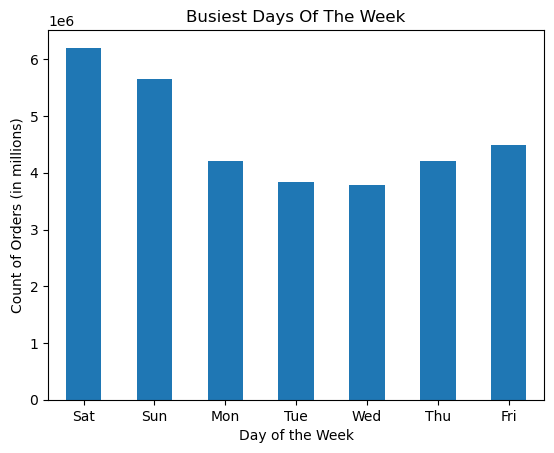

In [6]:
# Create a bar chart

ax = df_final['orders_day_of_week'].value_counts().sort_index().plot.bar()
# Title 
plt.title ('Busiest Days Of The Week')
# labels
plt.xlabel ('Day of the Week')
plt.ylabel ('Count of Orders (in millions)')

day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']  
ax.set_xticklabels(day_labels, rotation=0)

plt.show()


Text(0.5, 1.0, 'Histogram')

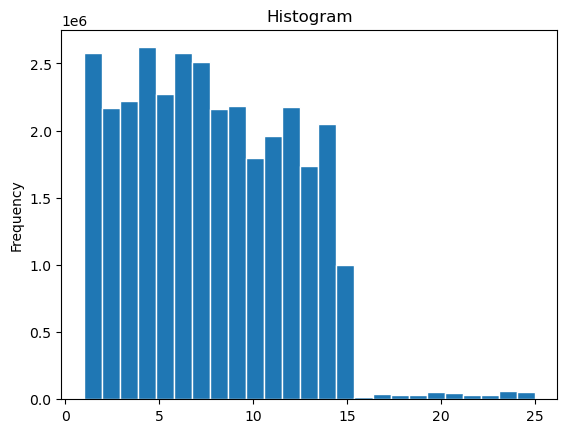

In [7]:
# Create histogram
df_final['prices'].plot.hist(bins = 25, edgecolor='white')
# Title 
plt.title ('Histogram')

<Axes: xlabel='prices', ylabel='prices'>

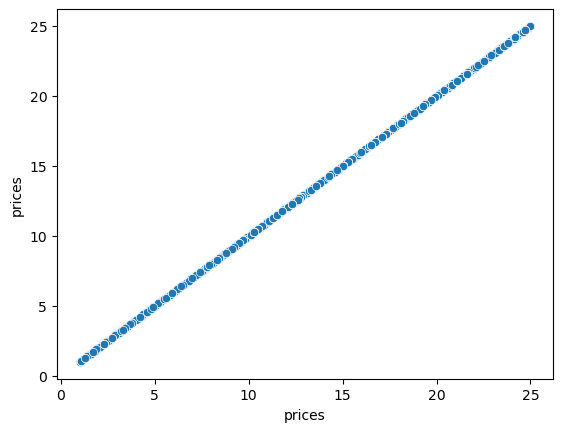

In [10]:
# Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_final)

In [8]:
#Create a random sample 
np.random.seed(4)

In [9]:
#create a list of holding True/False values to the test np.ransom.rand()<=0.7
dev = np.random.rand(len(df_final)) <= 0.7

In [11]:
#store 70% of the sample in the data frame big
big = df_final[dev]

In [10]:
#store 30% or the sample in the dataframe small
small = df_final[~dev]

In [17]:
len(df_final)

32404859

In [18]:
len(big)+len(small)

32404859

In [17]:
df_1 = small[['orders_day_of_week','prices']]

[Text(0, 0, 'Sat'),
 Text(1, 0, 'Sun'),
 Text(2, 0, 'Mon'),
 Text(3, 0, 'Tue'),
 Text(4, 0, 'Wed'),
 Text(5, 0, 'Thu'),
 Text(6, 0, 'Fri')]

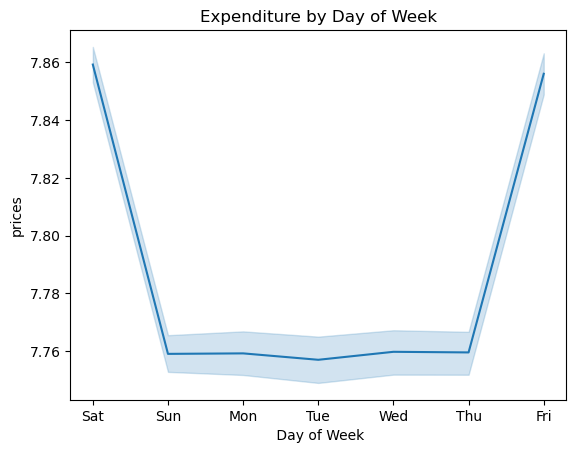

In [18]:
line = sns.lineplot(data = df_1, x = 'orders_day_of_week',y = 'prices')
plt.title("Expenditure by Day of Week")
plt.xlabel(" Day of Week")
line.set_xticks(range(0, 7))
line.set_xticklabels(['Sat','Sun','Mon','Tue','Wed','Thu','Fri'], rotation=0)

# Step 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.In a markdown cell beneath your histogram, describe what the histogram demonstrates

Text(0, 0.5, 'Count of Orders (in millions)')

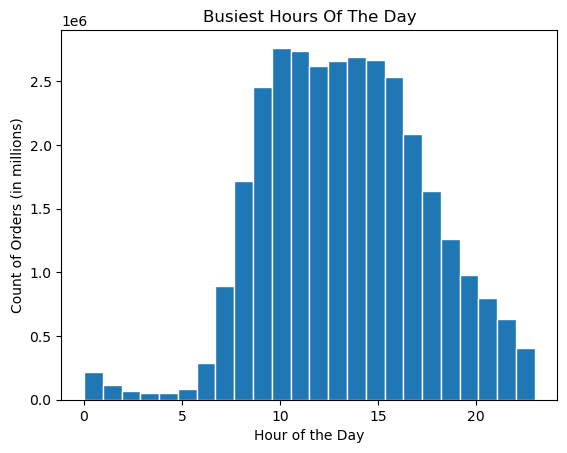

In [5]:
#creating histogram with 24 bins each representing each hour
hist_order_hour_of_day = df_final['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')
# Title 
plt.title ('Busiest Hours Of The Day')
# labels
plt.xlabel ('Hour of the Day')
plt.ylabel ('Count of Orders (in millions)')


#### The histogram shows that Instacart orders are highest during late morning to mid-afternoon (roughly 10 AM–3 PM), indicating this is the peak shopping window for customers. Order volume is very low overnight and early morning, then rises quickly after 7–8 AM and gradually declines into the evening.

# Step 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0, 0.5, 'Count of orders (in millions)')

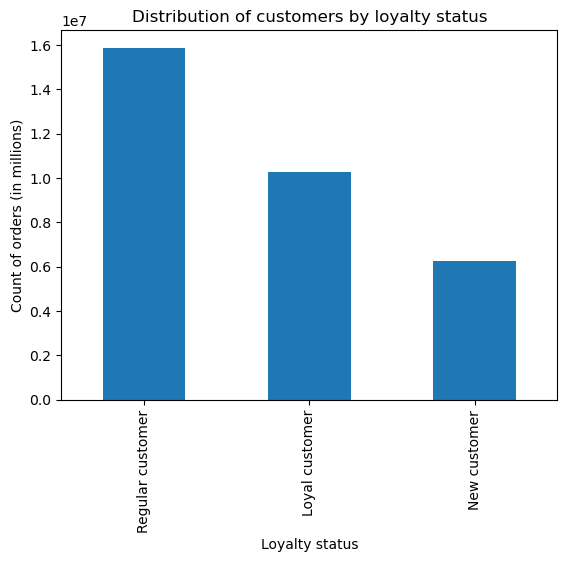

In [18]:
#Creating loyalty flag bar chart
bar_loyalty_flag = df_final['loyalty_flag'].value_counts().plot.bar()
# Title 
plt.title ('Distribution of customers by loyalty status')
# labels
plt.xlabel ('Loyalty status')
plt.ylabel ('Count of orders (in millions)')

# Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [14]:
# Creating a new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [23]:
df_2.head(5)

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


Text(0.5, 0, ' Hour of Day')

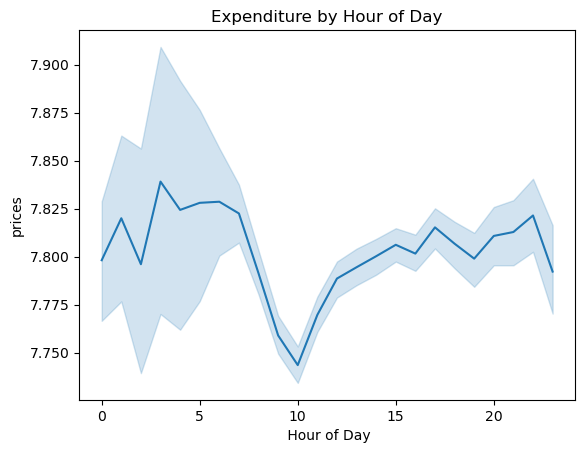

In [16]:
# Create the line chart
line_order_hour_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title("Expenditure by Hour of Day")
plt.xlabel(" Hour of Day")

# Step 6:determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.In a markdown cell beneath your line chart, describe what the line chart shows.

In [11]:
#new dataframe that contains only the "age" and "number_of_dependants" columns from small subset
df_3 = small[['age','no_of_dependents']]

In [12]:
df_3.head(5)

,age,no_of_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


Text(0, 0.5, 'Number of dependents')

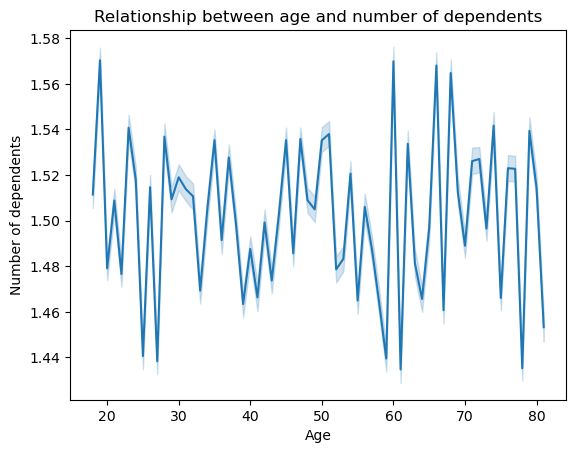

In [13]:
#Create the line chart
line_age_no_of_dependents = sns.lineplot(data = df_3, x = 'age',y = 'no_of_dependents')
plt.title("Relationship between age and number of dependents")
plt.xlabel("Age")
plt.ylabel("Number of dependents")

#### The line chart shows that the average number of dependents remains fairly stable across all age groups, staying close to about 1.4–1.6 dependents, with only minor fluctuations. Overall, there is no strong relationship between age and family situation in this dataset, suggesting age does not significantly impact the number of dependents.

# Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [15]:
#Create a new dataframe that contains only the "age" and "income" columns from small subset 
df_4 = small[['age','income']]

In [32]:
df_4.head(5)

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


Text(0.5, 1.0, 'Relationship between age and income')

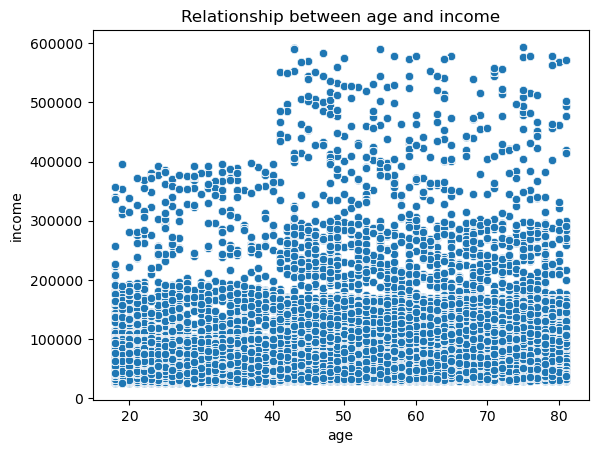

In [16]:
#Create a scatterplot
scatter_age_income = sns.scatterplot(data = df_4, x = 'age', y = 'income')
plt.title("Relationship between age and income")

#### The scatter plot suggests no strong linear relationship between age and income, since income values are widely spread across nearly all age groups. However, customers in the middle-to-older age range (around 40–80) show a broader spread and more high-income observations

# Step 8: Export your visualizations as “.png” files in your relevant project folder.

In [19]:
# Export bar chart
ax.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_order_day_of_week.png'))

In [20]:
# Export line chart
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'line_order_day_prices.png'))

In [22]:
#Export Histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [19]:
# Export bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [21]:
# Export line chart
line_order_hour_prices.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'line_order_hour_prices.png'))

In [14]:
# Export line chart
line_age_no_of_dependents.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'line_age_no_of_dependents.png'))

In [17]:
# Export scatterplot
scatter_age_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'scatter_age_income.png'))